In [1]:
import cv2
import numpy as np
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11493376/11490434 [==============================] - 0s 0us/step


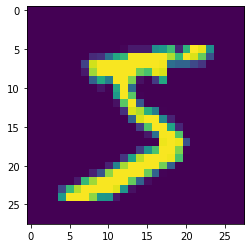

In [3]:
plt.imshow(x_train[0])

In [0]:
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

In [0]:
rgb_list = []
dim = (139, 139)
for i in range(len(x_train)):
    rgb = to_rgb(x_train[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_train = np.squeeze(rgb_arr, axis=4)

In [0]:
rgb_list = []
for i in range(len(x_test)):
    rgb = to_rgb(x_test[i])
    rgb_list.append(rgb)
    #print(rgb.shape) 
rgb_arr = np.stack([rgb_list],axis=4)
X_test = np.squeeze(rgb_arr, axis=4)

In [0]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


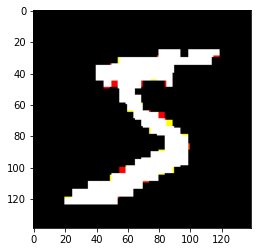

In [8]:
plt.imshow(X_train[0])

In [9]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(60000, 139, 139, 3) (10000, 139, 139, 3) (60000, 10) (10000, 10)


In [10]:
base = ResNet50(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

  229376/94653016 [..............................] - ETA: 20s

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 4096)              8392704   
_________________________________________________________________
Dropout_Regularization (Drop (None, 4096)              0         
_________________________________________________________________
Output (Dense)               (None, 10)                40970     
Total params: 32,021,386
Trainable params: 8,433,674
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,epochs=10,batch_size=500,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 309s 5ms/step - loss: 1.2212 - accuracy: 0.7868 - val_loss: 2.6432 - val_accuracy: 0.3539
Epoch 2/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.3099 - accuracy: 0.9046 - val_loss: 2.6553 - val_accuracy: 0.3734
Epoch 3/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.2263 - accuracy: 0.9307 - val_loss: 2.2799 - val_accuracy: 0.4909
Epoch 4/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.1768 - accuracy: 0.9465 - val_loss: 2.6304 - val_accuracy: 0.4028
Epoch 5/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.1526 - accuracy: 0.9563 - val_loss: 3.2065 - val_accuracy: 0.3743
Epoch 6/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.1228 - accuracy: 0.9620 - val_loss: 3.2774 - val_accuracy: 0.3913
Epoch 7/10
60000/60000 [==============================] - 295s

In [0]:
from sklearn.metrics import precision_score,recall_score,log_loss

In [16]:
y_pred = model.predict(X_test)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.0
Precision for class 1 = 0.9985250737463127
Precision for class 2 = 0.5
Precision for class 3 = 0.5873493975903614
Precision for class 4 = 0.9850746268656716
Precision for class 5 = 0.2917971195992486
Precision for class 6 = 0.4995433789954338
Precision for class 7 = 0.3424657534246575
Precision for class 8 = 0.8912429378531074
Precision for class 9 = 0.21161825726141079
Mean Precision =  0.5307616545336205


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.0
Recall for class 1 = 0.5964757709251102
Recall for class 2 = 0.0009689922480620155
Recall for class 3 = 0.38613861386138615
Recall for class 4 = 0.06720977596741344
Recall for class 5 = 0.5224215246636771
Recall for class 6 = 0.5709812108559499
Recall for class 7 = 0.048638132295719845
Recall for class 8 = 0.6478439425051334
Recall for class 9 = 0.9603567888999008
Mean Recall =  0.3801034752222353


In [19]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  19.928643721354174
